In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [75]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [76]:
#Problem is classification Problem

In [77]:
# Checking top 5 rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
# Checking Last 5 Rows

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [79]:
# Checking Datatypes

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [80]:
# Checking Datatypes

df.shape

(891, 12)

In [81]:
#checking null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
# we have to treat null values 
#simple imputer method for target variable Embarked and feature variable Cabin as categorical data
#Mean method for variable Age as integer data

In [83]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Age']=df['Age'].fillna(df['Age'].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [84]:
# Checking Columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
df=df.drop(["Name"],axis=1)
df                                                                       #As Name is nominal data so we can drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [86]:
#Again checking Null Values

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [87]:
# Now no null values present so further treatment not needed

<Axes: >

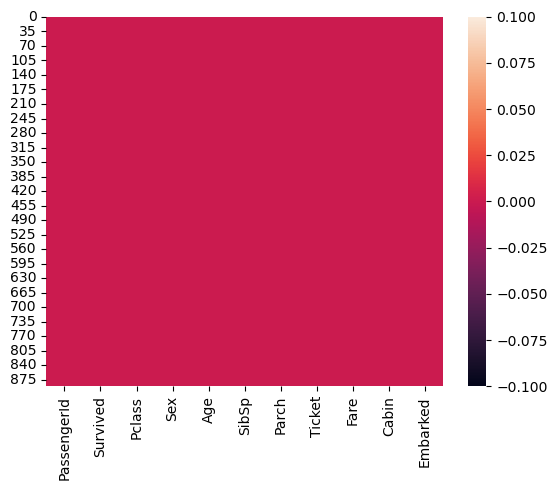

In [88]:
 # Draw Heatmap of Null Values
    
sns.heatmap(df.isnull())

In [89]:
#Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Data Analysis and Visulization

Statistical measure of dataset :

In [90]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
#observations > difference in 3rd quartile and max shows outliers are present
#mean>median-> data is right skewed and mean<median -> data is left skewed

In [92]:
#want to describe along categorical data

In [93]:
df.describe(include=['O'])

,Sex,Ticket,Cabin,Embarked
count,891,891,891,891
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,691,646


In [94]:
#Target Variable

In [95]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [96]:
#Data balancing needed as classification problem . Either we can do by SMOTE technique or Normalization Technique
#Normalization Done because SMOTE technique was taking error

In [97]:
# Now DATA is BALANCED

In [98]:
#Above result can be shown in histogram :

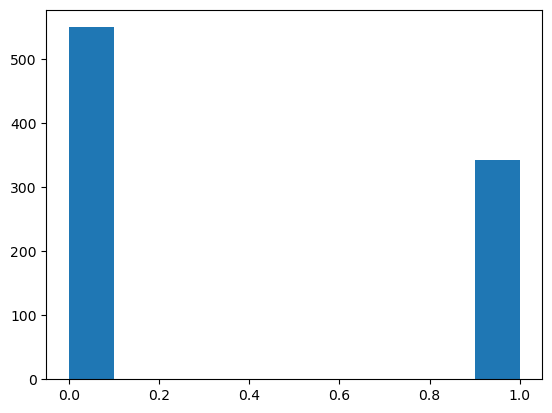

In [99]:
df['Survived'].hist(grid=False)
plt.show()

549 people will not survive and 342 people will survive

# EDA :

* UNIVARIATE ANALYSIS

In [100]:
# Countplot for categorical columns

<Axes: xlabel='Survived', ylabel='count'>

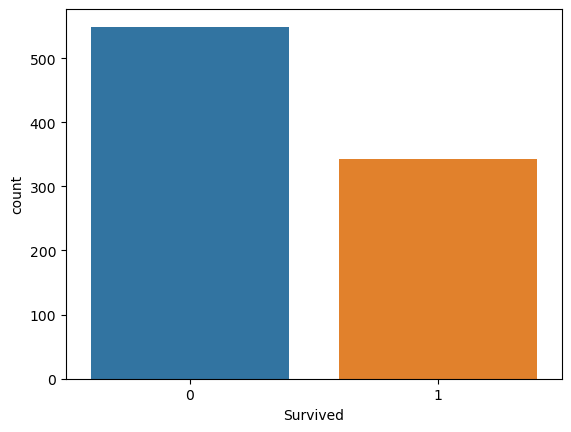

In [101]:
# Survived Plot

sns.countplot(x='Survived',data=df)

Shows 0-> No. of people not survive and 1-> No. of people survives.

<Axes: xlabel='Pclass', ylabel='count'>

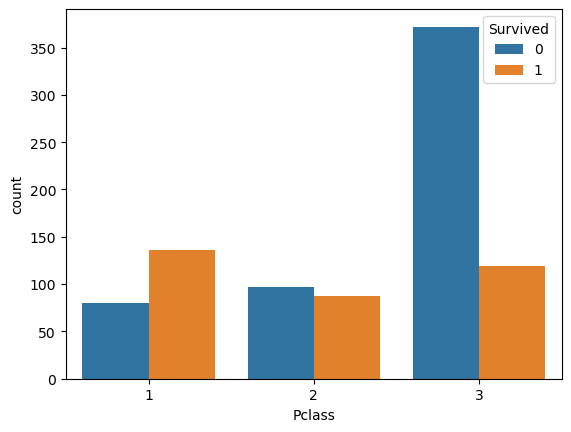

In [102]:
# Pclass Plot

sns.countplot(x='Pclass',hue='Survived',data=df)

No of passengers 0->not survived and 1->survived shown for each class.

<Axes: xlabel='Sex', ylabel='count'>

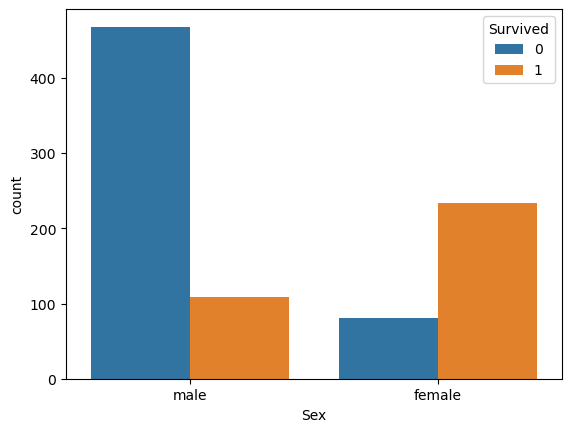

In [103]:
#Sex Countplot

sns.countplot(x='Sex',hue='Survived',data=df)

No of Male and Female passengers in both survived and not survived shown

<Axes: xlabel='SibSp', ylabel='count'>

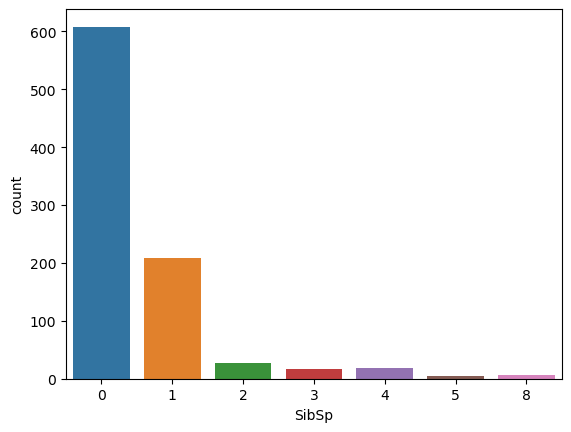

In [104]:
# SibSp Plot (siblings and spouse)

sns.countplot(x='SibSp',data=df)

Mostly passengers are solo passengers as high values lies in 0. Very less passengers have 8 siblings.

<Axes: xlabel='Parch', ylabel='count'>

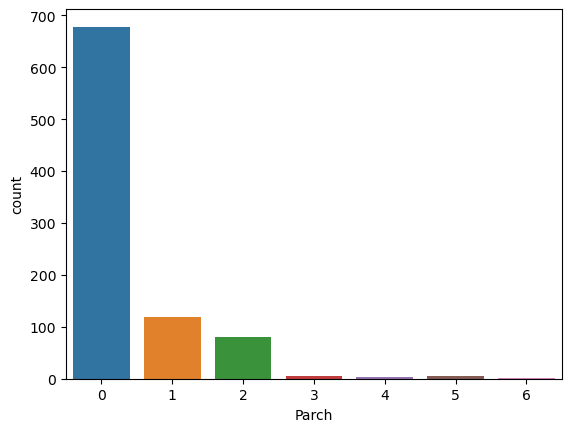

In [105]:
# Parch Plot (Parents and children plot)

sns.countplot(x='Parch',data=df)

Here around 650 passengers don't have children

<Axes: xlabel='Embarked', ylabel='count'>

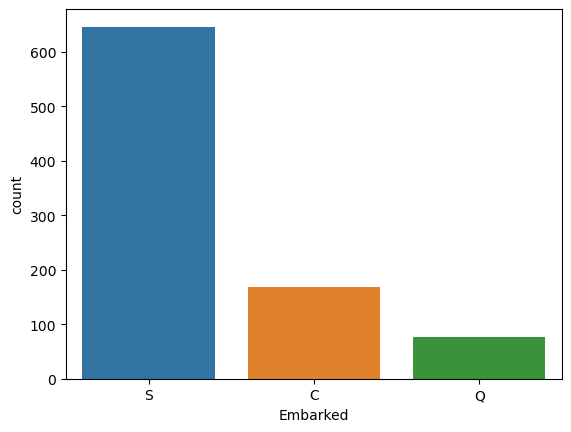

In [106]:
# Emabrked Plot (Cities from where People Travelling)

sns.countplot(x='Embarked',data=df)

No. of passengers shown for all 3 types of cities from where they are coming

In [107]:
# Distribution Plot for Numerical columns

* Checking Distribution of Curve

<Axes: xlabel='Age', ylabel='Density'>

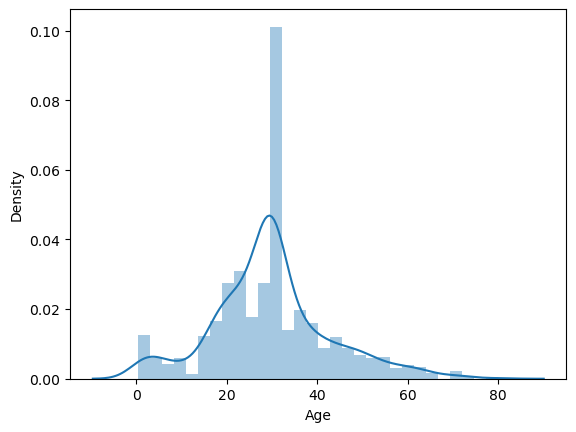

In [108]:
#Age Distribution

sns.distplot(df['Age'])

Age Column have symmetrical data as bell shaped curve and max passengers age lies in 20-30.

In [109]:
## ** Ticket and Cabin is object type so we can't process it . We will plot Fare as integer type **

<Axes: xlabel='Fare', ylabel='Density'>

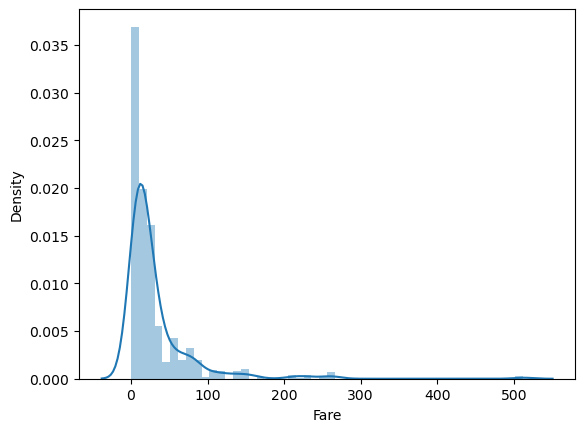

In [110]:
#Fare Distribution

sns.distplot(df['Fare'])

Max passengers can afford less Fare so data is skewed to 0 to 50 values and later on passengers decreses as high fare can't afford

In [111]:
## We can show it through Class also as people with high high class travels less as Fare high.

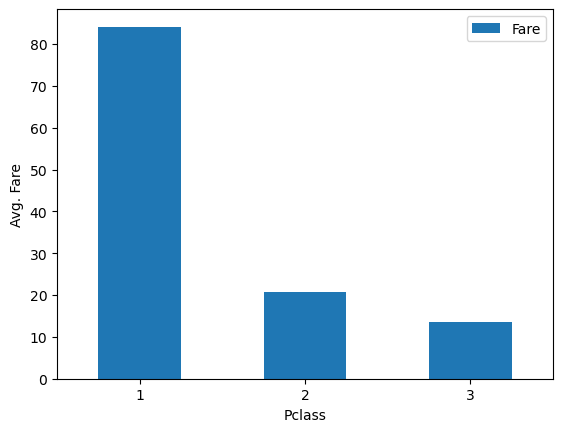

In [112]:
class_fare=df.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

It shows Fare is very high for 1st class and very less for 3rd class.

* BIVARIATE ANALYSIS

We check input parameters with output measure "survived" through Bar Plots :

<Axes: xlabel='Survived', ylabel='Pclass'>

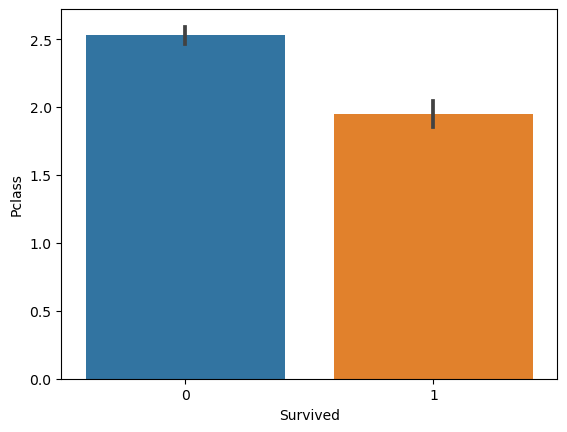

In [113]:
# Pclass vs Survived

sns.barplot(x='Survived',y='Pclass',data=df)

This is inverse relation as Pclass increses , people will survive less

<Axes: xlabel='Survived', ylabel='Sex'>

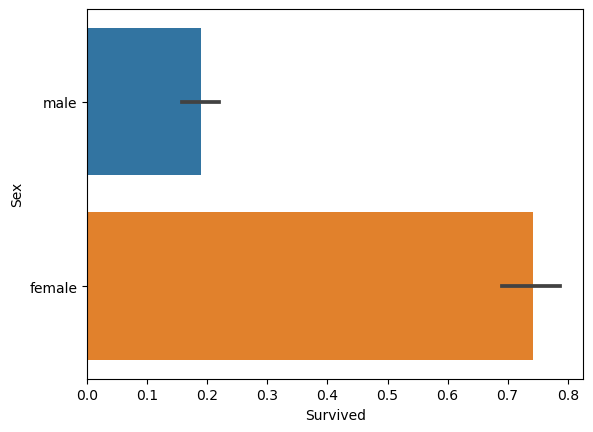

In [114]:
# Sex vs Survived

sns.barplot(x='Survived',y='Sex',data=df)

This is inverse relation as Sex increses , people will survive less

<Axes: xlabel='Survived', ylabel='SibSp'>

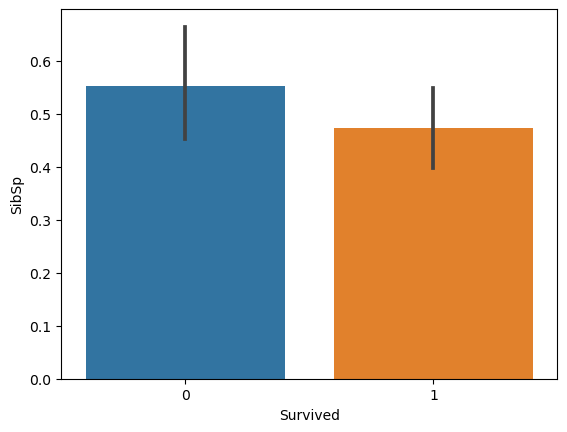

In [115]:
# SibSp vs Survived

sns.barplot(x='Survived',y='SibSp',data=df)

This is inverse relation as SibSp increses , people will survive less

<Axes: xlabel='Survived', ylabel='Parch'>

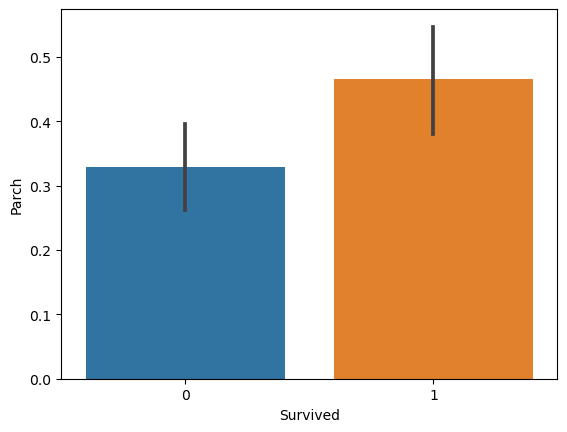

In [116]:
# Parch vs Survived

sns.barplot(x='Survived',y='Parch',data=df)

This is direct relation as Parch increses , people will survive more

<Axes: xlabel='Survived', ylabel='Embarked'>

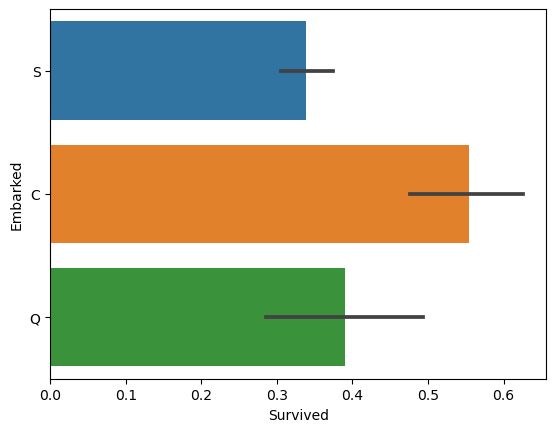

In [117]:
# Embarked vs Survived

sns.barplot(x='Survived',y='Embarked',data=df)

This is inverse relation as Emabarked value increses , people will survive less

In [118]:
## SCATTER PLOT For Continuous Data

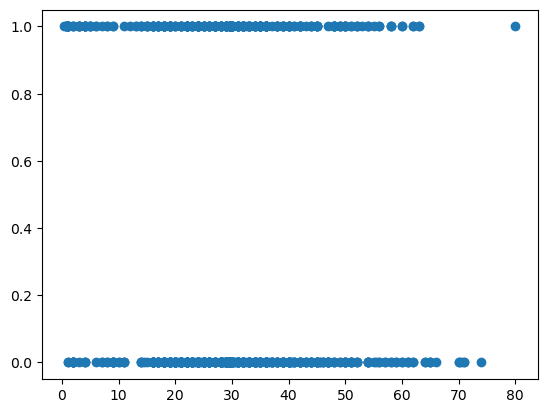

In [119]:
# Age Scatter Plot

plt.scatter(df['Age'],df['Survived'])

Max People Age lies in 1 to 60 years.

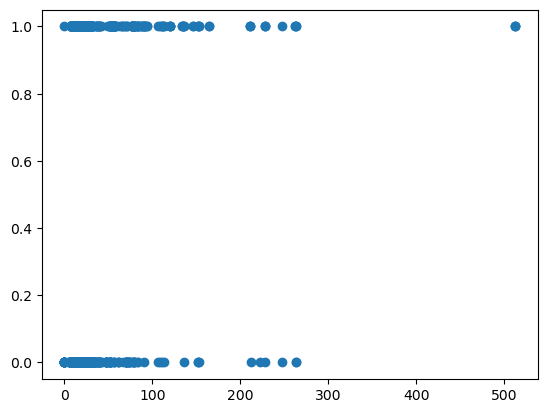

In [120]:
# Fare Scatter Plot

plt.scatter(df['Fare'],df['Survived'])

Max Values of Fare with Suvived lies in range 0 to 150.

In [121]:
##Ticket and Cabin Plots not possible in bivariate analysis as object data

* MULTIVARIATE ANALYSIS

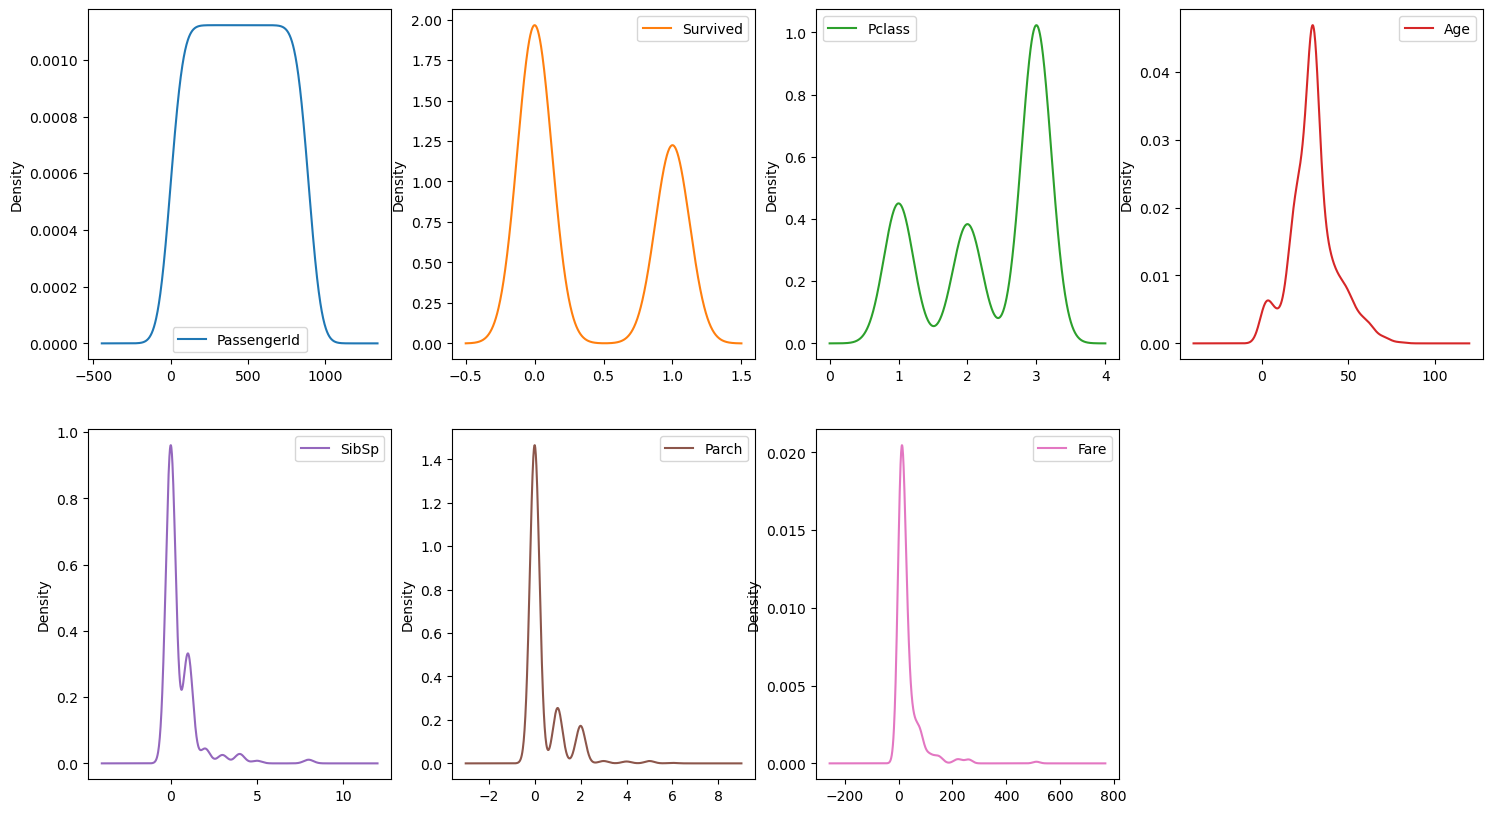

In [122]:
#check data distribution among all coulmns

df.plot(kind='density',subplots=True,layout=(2,4),sharex=False,legend=True,figsize=(18,10))
plt.show()

In [123]:
#Observation : We can see outliers and skewness is present in data

# Encoding Categorical Columns

In [124]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,"C":1,'Q':2}},inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,B96 B98,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,0
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,0,35.000000,0,0,373450,8.0500,B96 B98,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,B96 B98,0
887,888,1,1,1,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,1,29.699118,1,2,W./C. 6607,23.4500,B96 B98,0
889,890,1,1,0,26.000000,0,0,111369,30.0000,C148,1


# Correlation :

In [125]:
#Now we check correlation of input parameters with output "quality" :
#positively correlated : direct correlation
#negatively correlated : negative correlation

In [126]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<Axes: >

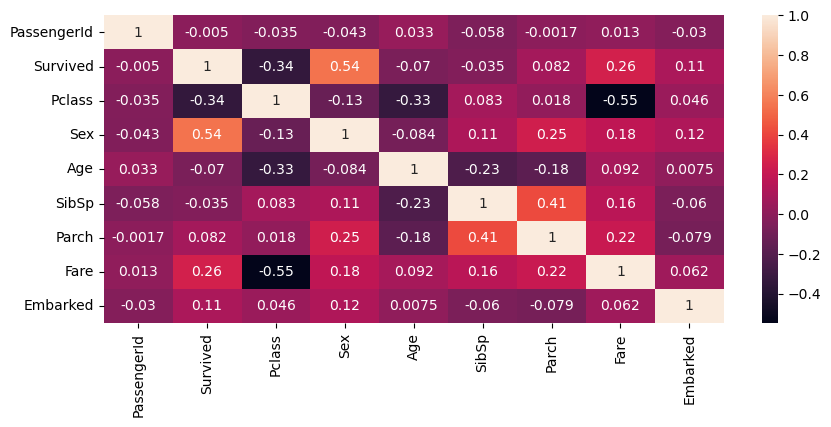

In [127]:
# For better understanding of correlation matrix between columns we draw heatmap :

plt.figure(figsize=(10,4))
sns.heatmap(dfcor,annot=True)

<Axes: >

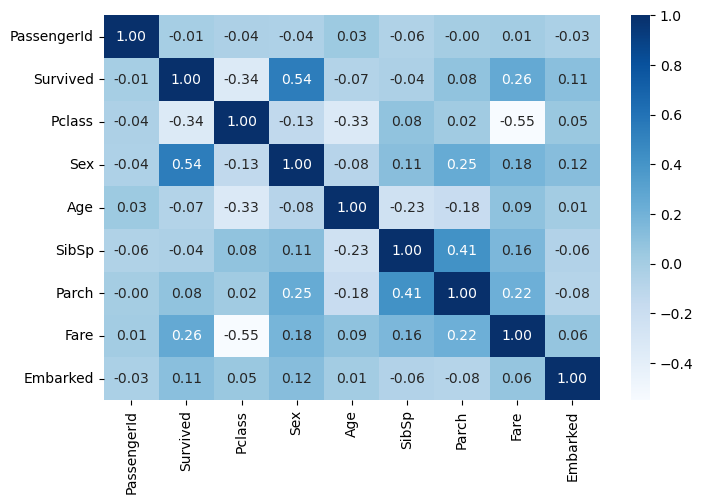

In [128]:
# We can change color also and decimal values place :

plt.figure(figsize=(8,5))
sns.heatmap(dfcor,annot=True,cmap='Blues',fmt='0.2f',cbar=True,square=False)

* Observation : We can directly see for Survived , Sex is directly positively correlated as value = 0.54 and Pclass is inverse as negative correlated value = - 0.34

# Data Preprocessing

In [129]:
df=df.drop(['Cabin'],axis=1) 
df                                                                    #As Cabin is nominal data so we can drop

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.000000,1,0,113803,53.1000,0
4,5,0,3,0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,0
887,888,1,1,1,19.000000,0,0,112053,30.0000,0
888,889,0,3,1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,0,26.000000,0,0,111369,30.0000,1


In [130]:
# Split x and y

x=df.drop(columns=['PassengerId','Survived','Ticket'],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [131]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Handling Imbalance Data :

In [132]:
# Oversampling

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()   

0    549
1    549
Name: Survived, dtype: int64

Now Data is balanced here

# Skewness :

In [133]:
x.skew().sort_values(ascending=False)

Fare        4.191556
SibSp       3.887190
Parch       2.720308
Embarked    1.626370
Sex         0.480174
Age         0.353308
Pclass     -0.463241
dtype: float64

Observation : High skewness present so we apply Transformation.


In [134]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.92893137, -0.78858173, -0.4929078 , ..., -0.57358326,
        -0.9513368 , -0.59465584],
       [-1.38443754,  1.26809937,  0.69862562, ..., -0.57358326,
         1.22449668,  1.64483317],
       [ 0.92893137,  1.26809937, -0.18507982, ..., -0.57358326,
        -0.86263033, -0.59465584],
       ...,
       [-1.38443754, -0.78858173, -0.02623321, ..., -0.57358326,
         0.32425899, -0.59465584],
       [-1.38443754,  1.26809937,  0.85632454, ..., -0.57358326,
         1.75937085,  1.64483317],
       [-1.38443754, -0.78858173, -0.92977935, ..., -0.57358326,
         1.39381094, -0.59465584]])

In [135]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [136]:
#after transformation check skewness

x.skew().sort_values(ascending=False)

Parch       1.173582
Embarked    1.090239
SibSp       0.840935
Sex         0.480174
Age         0.024475
Fare       -0.036550
Pclass     -0.337548
dtype: float64

Observation : Skewness in range of (-0.3 to +1.2). Now We can do scaling

# Feature Scaling :

In [137]:
# Scaling increases the model performance to much extent, we get best result after scaling data

In [138]:
# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x)
x1

array([[ 0.92893137, -0.78858173, -0.4929078 , ..., -0.57358326,
        -0.9513368 , -0.59465584],
       [-1.38443754,  1.26809937,  0.69862562, ..., -0.57358326,
         1.22449668,  1.64483317],
       [ 0.92893137,  1.26809937, -0.18507982, ..., -0.57358326,
        -0.86263033, -0.59465584],
       ...,
       [-1.38443754, -0.78858173, -0.02623321, ..., -0.57358326,
         0.32425899, -0.59465584],
       [-1.38443754,  1.26809937,  0.85632454, ..., -0.57358326,
         1.75937085,  1.64483317],
       [-1.38443754, -0.78858173, -0.92977935, ..., -0.57358326,
         1.39381094, -0.59465584]])

In [139]:
x=pd.DataFrame(x1,columns=x.columns)                                   #convert scaled data into DataFrame

In [140]:
# Multicollinearity Check VIF Technique

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

   VIF Factor  features
0    2.161705    Pclass
1    1.100263       Sex
2    1.249923       Age
3    1.365006     SibSp
4    1.473039     Parch
5    2.520310      Fare
6    1.038659  Embarked


* Observation : As vif value < 5 so no multicollinearity present


# Outliers detection :

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.932966,0.770463,0.524854,1.406718,0.565204,0.967427,0.591865
1,1.369011,1.297920,0.658076,1.406718,0.565204,1.240725,1.653924
2,0.932966,1.297920,0.219817,0.673690,0.565204,0.878494,0.591865
3,1.369011,1.297920,0.443037,1.406718,0.565204,0.973699,0.591865
4,0.932966,0.770463,0.443037,0.673690,0.565204,0.862841,0.591865
...,...,...,...,...,...,...,...
1093,1.369011,1.297920,1.118665,0.673690,1.721264,1.038528,0.591865
1094,1.369011,0.770463,0.069700,0.673690,0.565204,0.597920,0.591865
1095,0.389519,0.770463,2.118759,1.722479,1.721264,0.485068,0.591865
1096,1.369011,0.770463,0.760895,1.406718,0.565204,1.012582,0.591865


In [70]:
threshold=3
print(np.where(z>3))

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 630, 633, 674, 732,
       806, 815, 822, 851], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2], dtype=int64))


In [71]:
# Removing outliers from x

df1=df[(z<3).all(axis=1)]
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.000000,1,0,113803,53.1000,0
4,5,0,3,0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,211536,13.0000,0
887,888,1,1,1,19.000000,0,0,112053,30.0000,0
888,889,0,3,1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,0,26.000000,0,0,111369,30.0000,1


In [72]:
#After outliers removal some rows are removed so check data loss :-

In [73]:
# % Data Loss

data_loss=(1098-874)/1098*100
print(data_loss)

20.40072859744991


In [145]:
# As our data loss is high so we will not remove outliers.

# Train and Test Splitting :

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)

In [143]:
x.shape,x_train.shape,x_test.shape

((1098, 7), (878, 7), (220, 7))

# Modelling :

Metrics imported :

In [144]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

1. LOGISTICS REGRESSION


In [145]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

Our Model is successfully trained , Lets perform prediction

In [146]:
pred_train_lr=LR.predict(x_train)
predlr=LR.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100) 
print("Testing Accuracy:-",accuracy_score(y_test,predlr)*100)         #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predlr))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predlr))                    # Take Classification report as CR

Training Accuracy 76.87927107061503
Testing Accuracy:- 82.27272727272728
CM:- [[84 18]
 [21 97]]
CR:-               precision    recall  f1-score   support

           0       0.80      0.82      0.81       102
           1       0.84      0.82      0.83       118

    accuracy                           0.82       220
   macro avg       0.82      0.82      0.82       220
weighted avg       0.82      0.82      0.82       220



In [147]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=7)
print("Cross Validation Score of Logistic Regression model:-",cr_1.mean())
diff_1=accuracy_score(y_test,predlr)-cr_1.mean()
print("diff between accuracy score and cross validation score is -",diff_1)

Cross Validation Score of Logistic Regression model:- 0.7750577448029679
diff between accuracy score and cross validation score is - 0.0476695279243049


* Apply More Classifiers :

2. Decision Tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [149]:
pred_train_dtc=dt.predict(x_train)
preddt=dt.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100) 
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,preddt))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,preddt))                    # Take Classification report as CR

Training Accuracy 98.29157175398633
Testing Accuracy 83.18181818181817
CM:- [[85 17]
 [20 98]]
CR:-               precision    recall  f1-score   support

           0       0.81      0.83      0.82       102
           1       0.85      0.83      0.84       118

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.83      0.83      0.83       220



In [150]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=7)
print("Cross Validation Score of Decision Tree Classifier:-",cr_2.mean())
diff_2=accuracy_score(y_test,preddt)-cr_2.mean()
print("diff between accuracy score and cross validation score is -",diff_2)

Cross Validation Score of Decision Tree Classifier:- 0.7951634352908238
diff between accuracy score and cross validation score is - 0.036654746527358006


3. Support Vector Classifier

In [151]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [152]:
pred_train_svc=svc.predict(x_train)
predsvc=svc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predsvc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predsvc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predsvc))                    # Take Classification report as CR

Training Accuracy 82.57403189066059
Testing Accuracy 80.9090909090909
CM:- [[92 10]
 [32 86]]
CR:-               precision    recall  f1-score   support

           0       0.74      0.90      0.81       102
           1       0.90      0.73      0.80       118

    accuracy                           0.81       220
   macro avg       0.82      0.82      0.81       220
weighted avg       0.82      0.81      0.81       220



In [153]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(svc,x,y,cv=7)
print("Cross Validation Score of Support Vector Classifier:-",cr_3.mean())
diff_3=accuracy_score(y_test,predsvc)-cr_3.mean()
print("diff between accuracy score and cross validation score is -",diff_3)

Cross Validation Score of Support Vector Classifier:- 0.7924220153519518
diff between accuracy score and cross validation score is - 0.016668893738957302


4. MultinomialNB

In [154]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(abs(x_train),y_train)

MultinomialNB()

In [155]:
pred_train_mnb=mnb.predict(x_train)
predmnb=mnb.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_mnb)*100) 
print("Testing Accuracy",accuracy_score(y_test,predmnb)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predmnb))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predmnb))                    # Take Classification report as CR

Training Accuracy 63.097949886104786
Testing Accuracy 64.0909090909091
CM:- [[87 15]
 [64 54]]
CR:-               precision    recall  f1-score   support

           0       0.58      0.85      0.69       102
           1       0.78      0.46      0.58       118

    accuracy                           0.64       220
   macro avg       0.68      0.66      0.63       220
weighted avg       0.69      0.64      0.63       220



In [156]:
from sklearn.model_selection import cross_val_score
cr_4=cross_val_score(mnb,abs(x),y,cv=7)
print("Cross Validation Score of MultinomialNB:-",cr_4.mean())
diff_4=accuracy_score(y_test,predmnb)-cr_4.mean()
print("diff between accuracy score and cross validation score is -",diff_4)

Cross Validation Score of MultinomialNB:- 0.5509787452462611
diff between accuracy score and cross validation score is - 0.08993034566282976


5. KNeighbors Classifier

In [157]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit((x_train),y_train)

KNeighborsClassifier()

In [158]:
pred_train_knn=knn.predict(x_train)
predknn=knn.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_knn)*100) 
print("Testing Accuracy",accuracy_score(y_test,predknn)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predknn))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predknn))                    # Take Classification report as CR

Training Accuracy 83.94077448747153
Testing Accuracy 79.54545454545455
CM:- [[89 13]
 [32 86]]
CR:-               precision    recall  f1-score   support

           0       0.74      0.87      0.80       102
           1       0.87      0.73      0.79       118

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.81      0.80      0.80       220



In [159]:
from sklearn.model_selection import cross_val_score
cr_5=cross_val_score(knn,x,y,cv=7)
print("Cross Validation Score of KNeighbors Classifier:-",cr_5.mean())
diff_5=accuracy_score(y_test,predknn)-cr_5.mean()
print("diff between accuracy score and cross validation score is -",diff_5)

Cross Validation Score of KNeighbors Classifier:- 0.788759011688948
diff between accuracy score and cross validation score is - 0.0066955337655973945


# Ensemble Method :

6.Random Forest Classifier :

In [160]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [161]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_rf)*100) 
print("Testing Accuracy",accuracy_score(y_test,predrf)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predrf))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predrf))                    # Take Classification report as CR

Training Accuracy 98.29157175398633
Testing Accuracy 84.0909090909091
CM:- [[90 12]
 [23 95]]
CR:-               precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.89      0.81      0.84       118

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.85      0.84      0.84       220



In [162]:
from sklearn.model_selection import cross_val_score
cr_6=cross_val_score(rf,x,y,cv=7)
print("Cross Validation Score of Random Forest Classifier:-",cr_6.mean())
diff_6=accuracy_score(y_test,predrf)-cr_6.mean()
print("diff between accuracy score and cross validation score is -",diff_6)

Cross Validation Score of Random Forest Classifier:- 0.8124460465224796
diff between accuracy score and cross validation score is - 0.02846304438661129


7. Gradient Boosting Classifier:

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [164]:
pred_train_gbc=gbc.predict(x_train)
predgbc=gbc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_gbc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predgbc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predgbc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predgbc))                    # Take Classification report as CR

Training Accuracy 88.38268792710706
Testing Accuracy 82.27272727272728
CM:- [[88 14]
 [25 93]]
CR:-               precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.87      0.79      0.83       118

    accuracy                           0.82       220
   macro avg       0.82      0.83      0.82       220
weighted avg       0.83      0.82      0.82       220



In [165]:
from sklearn.model_selection import cross_val_score
cr_7=cross_val_score(gbc,x,y,cv=7)
print("Cross Validation Score of Gradient Boosting Classifier:-",cr_7.mean())
diff_7=accuracy_score(y_test,predgbc)-cr_7.mean()
print("diff between accuracy score and cross validation score is -",diff_7)

Cross Validation Score of Gradient Boosting Classifier:- 0.8297286577541355
diff between accuracy score and cross validation score is - -0.007001385026862761


In [166]:
result = pd.DataFrame({'Models':['LR','dt','svc','mnb','knn','rf','gbc'],
                       'Accuracy':[accuracy_score(y_test,predlr)*100,
                                   accuracy_score(y_test,preddt)*100,
                                   accuracy_score(y_test,predsvc)*100,
                                   accuracy_score(y_test,predmnb)*100,
                                   accuracy_score(y_test,predknn)*100,
                                   accuracy_score(y_test,predrf)*100,
                                   accuracy_score(y_test,predgbc)*100],
                     'Difference of accuracy and cross-val':[diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7]})
result       

,Models,Accuracy,Difference of accuracy and cross-val
0,LR,82.272727,0.047670
1,dt,83.181818,0.036655
2,svc,80.909091,0.016669
3,mnb,64.090909,0.089930
4,knn,79.545455,0.006696
5,rf,84.090909,0.028463
6,gbc,82.272727,-0.007001


# Save Model

In [169]:
import joblib

joblib.dump(gbc,'titanic_survived')

['titanic_survived']

# Load Model

In [170]:
model=joblib.load('titanic_survived')

# Prediction

In [173]:
input_data=(2,1,38,0,1,71.2833,1)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Survived')
else:
    print('Not Survived')

[1]
Survived


Hence Titanic Survival Predicted